# p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다
    - 파라미터를 줄기고 키우고를 반복 (예시)
    - 오파를 파라미터로 미분한 값만큼 조절 (경사하강법)
    - 정규방정식으로 찾기 (빠르나, 데이터가 많아지면 메모리 부족)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균

- 1차원(vector) 데이터 : 점(dot)으로 분리
- 2차원(mastrix) 데이터 : 선(line)으로 분리
- 3차원(tensor, cube) 데이터 : 면(plane)으로 분리
- 4차원(tensor) 데이터 : 곰간으로 분리
면 이상의 차원은 초평면(hyperplane)

In [8]:
# p74
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # regressor 실수 예측용
import mglearn

w[0]: 0.393906  b: -0.031804


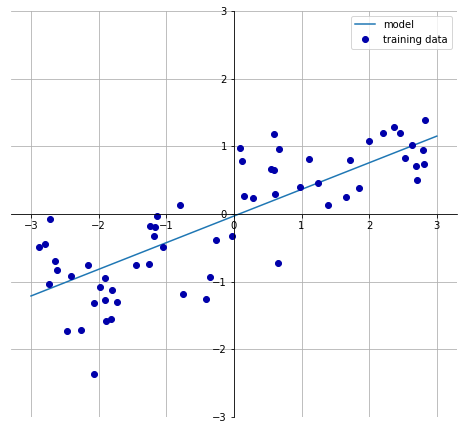

In [9]:
mglearn.plots.plot_linear_regression_wave()

# 키와 몸무게 데이터를 가지고, 몸무게로부터 키를 예측해보자

In [10]:
몸무게 = [30,60,70,90]
키 = [120,160,170,190]
몸무게_test = [65,80]

In [20]:
# 4행 1열로 변환
몸무게 = np.array(몸무게).reshape((4, 1))
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape((-1, 1))

In [21]:
# p76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
# fit - w와 b를 조절
lr.fit(X=몸무게, y=키)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([[162.93333333],
        [180.53333333]]))

In [28]:
lr.score(몸무게,키)

0.9928205128205129

In [29]:
# 계수 w(lr.coef_)와 절편 b(lr.coef_)
lr.coef_, lr.intercept_

(array([[1.17333333]]), array([86.66666667]))

In [30]:
lr.coef_*몸무게 + lr.intercept_ # y = w*x + b

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

# LinearRegression으로 내일의 코스피 200 종가 예측하기
- 샘플 : 하루의 총 일거래 정보
- 입력 : X : 하루 전 데이터
- 출력 : y : 다음 날의 종가
- 데이터 총 m=10, 학습용 8, 테스트 2
- 정규화는 생략

In [55]:
# 1. 데이터 읽어들이기
url = '코스피200 _ 다음 금융.html'
tables = pd.read_html(url, index_col=0) #날짜로 인덱스
len(tables)

3

In [56]:
for table in tables:
    print(table.shape)

(10, 6)
(10, 8)
(10, 7)


In [57]:
kospi200 = tables[1]
kospi200

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.86,▼0.41,-0.15%,21594,785504,327,36,-341
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557
19.06.25,275.28,▼0.30,-0.11%,60506,2635188,-364,277,-12
19.06.24,275.58,▲0.10,+0.04%,55539,2235175,-978,-1048,1966
19.06.21,275.48,▼0.53,-0.19%,77279,3275700,538,206,-767
19.06.20,276.01,▲0.70,+0.25%,55336,2417864,-1342,-434,1762


In [95]:
# 1. 전처리 : 전일비와 등락률이 수치로 변환
kospi200['전일비'] = kospi200['전일비'].replace('▼', '-', regex=True)
kospi200['전일비'] = kospi200['전일비'].replace('▲', '', regex=True)
kospi200['등락률'] = kospi200['등락률'].replace('%', '', regex=True)
kospi200['전일비'] = kospi200['전일비'].astype(np.float)
kospi200['등락률'] = kospi200['등락률'].astype(np.float)

In [108]:
# min, max 정규화
minimum = np.min(kospi200, axis=0)
maximum = np.max(kospi200, axis=0)
kospi200_normal = (kospi200 - minimum) / (maximum - minimum)

In [109]:
# 2. 데이터 x, y로 분류
X = kospi200_normal.iloc[1:] #오늘 데이터 제외
y = kospi200_normal.iloc[:-1, 0] # 가장오래된 데이터와 종가 외의 데이터 제외
X.shape, y.shape

((9, 8), (9,))

In [110]:
# 2. train / test 분류
offset = 2 # 학습용 갯수
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]

In [111]:
# 3. LinearRegression 모델로 fit
lr = LinearRegression()
lr = lr.fit(X=X_train, y=y_train)

In [121]:
# 4. 예측
lr.predict(X_test)

array([1.7739511 , 1.43068722])

In [122]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, -120.74425838205264)

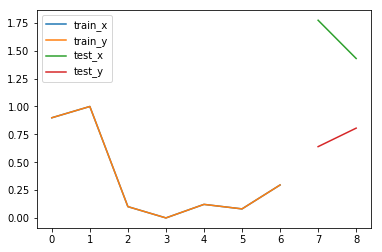

In [123]:
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train)+len(X_test))

plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()

In [124]:
# p78, 릿지 모델 : w를 가장 작게 만드는 LinearRegression
# W를 줄인다는 것은 y를 예측하는데 가능한 모든 특성을 반영하는 것 의미

In [125]:
from sklearn.linear_model import Ridge
rg = Ridge().fit(X=X_train, y=y_train)

In [126]:
rg.score(X_train, y_train), rg.score(X_test, y_test)

(0.25839492714099543, -4.0621232249646715)

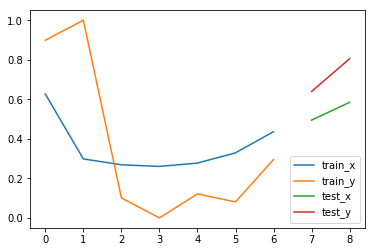

In [127]:
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train)+len(X_test))

plt.plot(train_len, rg.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, rg.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()

In [129]:
lr.coef_

array([-0.09522234, -8.34802525,  7.50632994, -0.31561531,  3.49775934,
        0.95385208,  1.79325718, -0.00856529])

In [130]:
rg.coef_

array([ 0.22328114, -0.0288523 ,  0.03208483, -0.01701279,  0.06959784,
       -0.08884177,  0.12466412, -0.00212489])

# p82, 라소 모델
- 라소는 L1규제(abs), 릿지는 L2규제(square)
- 몇가지 특징만 사용해서 y를 예측하고 싶을 때

In [131]:
from sklearn.linear_model import Lasso

In [160]:
# 1. 데이터 읽기
f = 'japan_money.csv'
df = pd.read_csv(f, encoding='cp949', index_col=0, header=3)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,상승2.87,Unnamed: 7,Unnamed: 8
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43","1,087.11/td>","1,074.22","1,066.74",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승1.42,NaN,NaN
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03","1,085.67/td>","1,072.80","1,073.35",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승0.30,NaN,NaN
2019.06.27,"1,082.90","1,062.10","1,091.26","1,053.74","1,085.37/td>","1,072.50","1,075.00",0.92


In [144]:
# 1. 데이터 정제
df4 = df.iloc[:, :4]
df4 = df4.dropna()
df4.head()

,보내실때,받으실때,사실때,파실때
2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25"
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43"
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03"
2019.06.27,"1,082.90","1,062.10","1,091.26","1,053.74"
2019.06.26,"1,086.17","1,065.31","1,094.56","1,056.92"


In [146]:
# 1. 데이터 전처리
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2019.07.02 to 2018.06.29
Data columns (total 4 columns):
보내실때    248 non-null object
받으실때    248 non-null object
사실때     248 non-null object
파실때     248 non-null object
dtypes: object(4)
memory usage: 9.7+ KB


In [150]:
df4 = df4.replace(',', '', regex=True)
df4 = df4.astype(np.float)

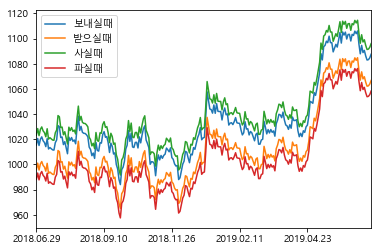

In [154]:
plt.rc('font', family='Malgun Gothic')
df4.iloc[::-1].plot()

In [164]:
# 1. 데이터 읽기
f = '8.8.1.1 주요국통화의 대원화 환.xls'
df2 = pd.read_excel(f, index_col=0, header=3)
df2.head()

,원자료,원자료.1
변환,,
2018/06/29,1121.7,1014.79
2018/06/30,NaN,NaN
2018/07/01,NaN,NaN
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26


In [168]:
df2.columns = ['미국달러', '일본엔']
df2 = df2.dropna()
df2.head()

,미국달러,일본엔
변환,,
2018/06/29,1121.7,1014.79
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26
2018/07/04,1121.1,1014.34
2018/07/05,1115.3,1009.55


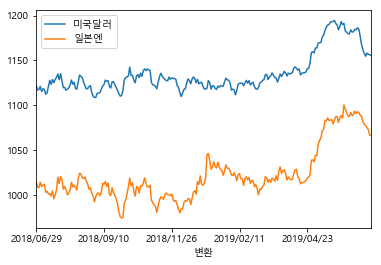

In [169]:
df2.plot()

In [175]:
window_week = 4
window_day = window_week * 5
predict_day = 5

In [173]:
# x, y 갯수
# 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5) = 1샘플, 총 5샘플

In [178]:
# 현재 248개의 샘플에서 233쌍의 x와 y 만들기
len(df2), len(df2) - (window_day + predict_day) +1

(248, 224)

In [179]:
offset = window_day + predict_day - 1
offset,len(df2) - offset

(24, 224)

In [185]:
before = df2.iloc[:-predict_day]
later = df2.iloc[window_day:]
before.shape, later.shape

((243, 2), (228, 2))

In [186]:
m = len(df2) - (window_day + predict_day - 1)
m

224

In [190]:
x_list = []
y_list = []
for i in range(m):
    x = df2.iloc[i:i+window_day] # 20일 데이터
    y = df2.iloc[i+window_day:i+window_day+predict_day] # 5일 데이터
    x_list.append(x.values)
    y_list.append(y.values)

In [193]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape # (instance, day, 특징수)

((224, 20, 2), (224, 5, 2))

In [194]:
X = np.reshape(X, [m, -1])
y = np.reshape(y, [m, -1])
X.shape, y.shape

((224, 40), (224, 10))

In [196]:
# train/test 분리
offset = 30
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 40), (30, 40), (194, 10), (30, 10))

In [202]:
# LinearRegression fit
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9205409567677935, -0.6547522365360025)

In [203]:
# Ridge fit
rg = Ridge().fit(X_train, y_train)
rg.score(X_train, y_train), rg.score(X_test, y_test)

(0.9205409191491469, -0.6542108232125314)

In [204]:
# Lasso fit
ls = Lasso().fit(X_train, y_train)
ls.score(X_train, y_train), ls.score(X_test, y_test)

(0.9184648749535445, -0.4608138315986671)

In [227]:
# 미래의 5일 환율 예측 그래프 시각화
마지막20일 = df2.iloc[-window_day:].values.reshape([1, -1])
미래5일 = ls.predict(마지막20일)
미래5일 = np.reshape(미래5일, [predict_day, 2])
미래5일

array([[1154.70405253, 1066.1302368 ],
       [1154.44576025, 1065.30706598],
       [1153.75894137, 1064.73738787],
       [1152.28094944, 1062.86299598],
       [1149.99673071, 1061.26929434]])

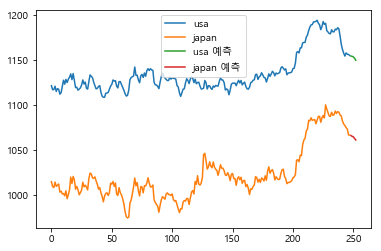

In [228]:
usa = df2.iloc[:, 0].values
japan = df2.iloc[:,1].values
usa_x_num = np.arange(len(usa))
usa_x1_num = np.arange(len(usa), len(usa)+len(미래5일))
japan_x_num = np.arange(len(japan))
japan_x1_num = np.arange(len(japan), len(japan)+len(미래5일))
plt.plot(usa_x_num, usa, label = 'usa')
plt.plot(japan_x_num, japan, label = 'japan')
plt.plot(usa_x1_num, 미래5일[:,0], label = 'usa 예측')
plt.plot(japan_x1_num, 미래5일[:,1], label = 'japan 예측')
plt.legend()

# 주택지수 미래 가격 예측하기
- 강남, 강북, 수도권 집값이 서울집값에 끼치는 영향

In [259]:
# 1. 데이터 읽기
f = 'stat_124001.xls'
house = pd.read_excel(f, encoding='cp949', index_col=0, header=2)
house.head()

,200601월,200602월,200603월,200604월,200605월,200606월,200607월,200608월,200609월,200610월,...,201808월,201809월,201810월,201811월,201812월,201901월,201902월,201903월,201904월,201905월
전국,0.3,0.5,0.6,0.9,1.0,0.5,0.2,0.2,0.5,1.3,...,0.0,0.3,0.2,0.1,0.0,-0.1,-0.1,-0.2,-0.2,-0.2
수도권,0.5,0.7,1.0,1.4,1.7,0.9,0.4,0.5,0.8,2.3,...,0.2,0.7,0.4,0.3,0.1,-0.1,-0.1,-0.2,-0.2,-0.2
서울,0.6,0.8,1.2,1.5,1.5,0.7,0.3,0.4,0.8,2.0,...,0.6,1.3,0.5,0.2,0.0,-0.2,-0.2,-0.2,-0.2,-0.1
강남,1.0,1.2,1.8,2.3,2.2,0.8,0.3,0.2,0.9,2.3,...,0.6,1.5,0.5,0.1,-0.1,-0.3,-0.3,-0.3,-0.2,-0.1
강북,0.2,0.3,0.5,0.7,0.7,0.6,0.4,0.5,0.7,1.5,...,0.6,1.0,0.6,0.3,0.2,-0.1,-0.1,-0.1,-0.1,-0.1


In [260]:
house = house.transpose()
house = house.iloc[:, :-2]
house = house.loc[:, ['강남', '강북', '수도권', '서울']]

In [268]:
window_month = 12
predict_month = 6
offset = window_day + predict_day - 1

In [269]:
m = len(house) - (window_day + predict_day - 1)
m

137

In [270]:
# 2. 데이터 x, y 분류
x_list = []
y_list = []
for i in range(m):
    x = house.iloc[i:i+window_day] # 6달 데이터
    y = house.iloc[i+window_day:i+window_day+predict_day] # 1달 데이터
    x_list.append(x.values)
    y_list.append(y.values)
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape # (instance, day, 특징수)

((137, 20, 4), (137, 5, 4))

In [271]:
X = np.reshape(X, [m, -1])
y = np.reshape(y, [m, -1])
X.shape, y.shape

((137, 80), (137, 20))

In [272]:
# train/test 분리
offset = 10
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 80), (10, 80), (127, 20), (10, 20))

In [273]:
# Ridge fit
rg = Ridge().fit(X_train, y_train)
rg.score(X_train, y_train), rg.score(X_test, y_test)

(0.7126813225245947, -0.532827666763851)

In [276]:
# 그래프 시각화
마지막12달 = house.iloc[-window_day:].values.reshape([1, -1])
미래1달 = rg.predict(마지막12달)
미래1달 = np.reshape(마지막12달, [predict_day, 4])



house = house.loc[:, ['강남', '강북', '수도권', '서울']]

강남 = house.iloc[:, 0].values
강북 = house.iloc[:, 1].values
수도권 = house.iloc[:, 2].values
서울 = house.iloc[:, 3].values

x_num = np.arange(len(house))
x_predict_num = np.arange(len(house), len(house)+len())

ValueError: cannot reshape array of size 80 into shape (5,4)

In [ ]:
japan = df2.iloc[:,1].values
usa_x_num = np.arange(len(usa))
usa_x1_num = np.arange(len(usa), len(usa)+len(미래5일))
japan_x_num = np.arange(len(japan))
japan_x1_num = np.arange(len(japan), len(japan)+len(미래5일))
plt.plot(usa_x_num, usa, label = 'usa')
plt.plot(japan_x_num, japan, label = 'japan')
plt.plot(usa_x1_num, 미래5일[:,0], label = 'usa 예측')
plt.plot(japan_x1_num, 미래5일[:,1], label = 'japan 예측')
plt.legend()